In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [5]:
(X_train,y_train),(X_test,y_test) = df

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

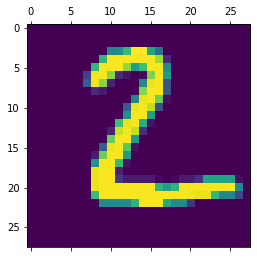

In [47]:
plt.matshow(X_test[1])

In [13]:
y_train[3]

1

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
X_test = X_test/255
X_train = X_train/255

In [33]:
X_train_flattened = X_train.reshape(len(X_train),784)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [36]:
X_train_flattened.shape

(60000, 784)

In [37]:
X_test_flattened.shape

(10000, 784)

In [38]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [40]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4733 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9262


In [41]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9260


[0.2670512795448303, 0.9259999990463257]

In [43]:
y_predicted = model.predict(X_test_flattened)

In [44]:
y_predicted[0]

array([3.1024039e-02, 2.1844993e-07, 6.4026594e-02, 9.5437604e-01,
       4.1334331e-03, 1.1728197e-01, 2.8212494e-06, 9.9982500e-01,
       1.2429938e-01, 7.1425498e-01], dtype=float32)

In [48]:
np.argmax(y_predicted[1])

2

In [49]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]

In [50]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [55]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  920,   18,   10,    3,   13,   11,   37,    4],
       [   2,    0,   16,  932,    0,   18,    2,   11,   20,    9],
       [   1,    1,    2,    1,  925,    0,   12,    3,    9,   28],
       [  10,    1,    2,   45,   11,  751,   18,    8,   38,    8],
       [   9,    3,    3,    1,    7,    6,  924,    2,    3,    0],
       [   2,    5,   21,    7,    9,    1,    0,  943,    2,   38],
       [   7,    6,    6,   21,    9,   17,   11,   11,  877,    9],
       [  11,    5,    1,   10,   36,    6,    0,   20,    6,  914]])>

Text(69.0, 0.5, 'Truth')

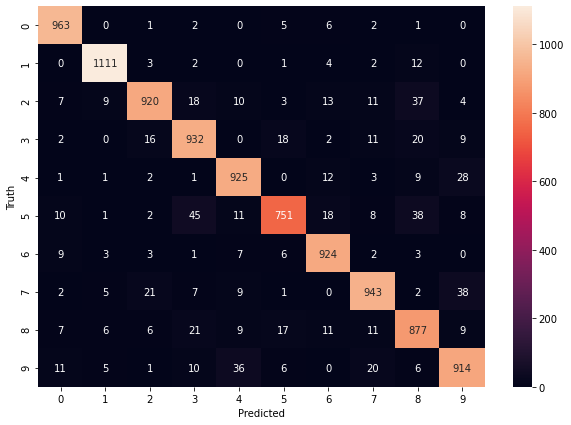

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2839 - accuracy: 0.9186
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1256 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0529 - accuracy: 0.9837


In [60]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9759


[0.08151313662528992, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

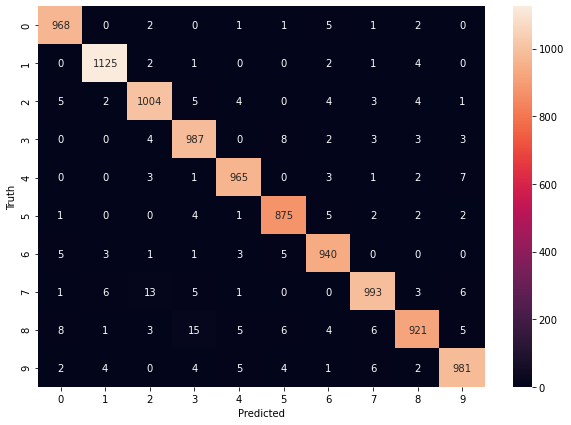

In [61]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2805 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0882 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9841
